In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Read "Doing Business Score" data from World Bank
df = pd.read_csv("DBData.csv")
# Remove irrelevant columns
df = df.drop(["Unnamed: 20", 'Indicator Code', 'Country Code'], 1)
# Pivot categories to categorical columns
df = pd.DataFrame(
        df.pivot(index='Indicator Name', 
                 columns='Country Name'
      ).unstack(
      ).reset_index(drop=False))
# Prettify column names
df.columns = ['Year', 'Country', 'Measure', 'Score']
# One row per country per year
# One column per score (with possible null values)
df = df.pivot_table(values='Score', index='Measure', columns=['Year', 'Country']
                   ).T.reset_index()
df.head(3)

Measure,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Same as above with World Bank GDP Data
gdp = pd.read_csv('GDPpc.csv')
gdp = gdp.drop(['Country Code', 'Indicator Code'], 1)
# One row per country per year with GDP
gdp = pd.DataFrame(
        gdp.pivot(index='Indicator Name', 
                 columns='Country Name'
      ).unstack(
      ).reset_index(drop=False)
)
gdp = gdp.drop('Indicator Name', 1)
gdp.columns = ['Year', 'Country', 'GDPperCap']
gdp.head(3)

,Year,Country,GDPperCap
0,1960,Afghanistan,59.777327
1,1960,Albania,NaN
2,1960,Algeria,244.824806


In [3]:
frt = pd.read_csv('frontierdistance.csv')
frt = frt.drop(['Country Code', 'Indicator Code'], 1)
frt = pd.DataFrame(
        frt.pivot(index='Indicator Name', 
                  columns='Country Name'
        ).unstack(
        ).reset_index(drop=False)
)
frt = frt.drop('Indicator Name', 1)
frt.columns = ['Year', 'Country', 'FrontierDistance']
frt.head(3)

,Year,Country,FrontierDistance
0,1960,Afghanistan,NaN
1,1960,Albania,NaN
2,1960,Algeria,NaN


In [4]:
frt = frt.merge(gdp, how='inner', on=['Year', 'Country'])
frt = frt.dropna()

In [28]:
frt = frt.sort_values(by='FrontierDistance')

In [37]:
X = sm.add_constant(frt['FrontierDistance'])
X['FrontierDistance2'] = X['FrontierDistance'] ** 2

est = sm.OLS(frt['GDPperCap'], X).fit()
# Regression Summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPperCap   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     319.1
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           9.01e-99
Time:                        11:06:43   Log-Likelihood:                -7486.1
No. Observations:                 691   AIC:                         1.498e+04
Df Residuals:                     688   BIC:                         1.499e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.105e+04   8812.553      5.793      0.000    3.37e+04    6.84e+04
FrontierDistance  -2307.2440    297.764     -7.749      0.000   -2891.879   -1722.608
FrontierDistance2    26.4500      2.459     10.754      0.000      21.621      31.279
==============================================================================
Omnibus:                      378.832   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4382.771
Skew:                           2.207   Prob(JB):                         0.00
Kurtosis:                      14.521   Cond. No.                     7.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
est.predict(exog=[1, 100, 10000])

array([84826.6953126])

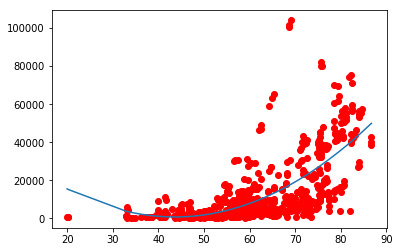

In [40]:
plt.scatter(frt['FrontierDistance'], frt['GDPperCap'], color='r')
plt.plot(frt['FrontierDistance'], est.predict(), '-')
plt.show()

# Component Score to GDP Regression

In [7]:
# Inner join both datasets together on country/year
df = df.merge(gdp, how='inner', on=['Year', 'Country'])
# Only keep observations where GDP Data is collected
df = df.loc[~df.GDPperCap.isna()]
df.Year = df.Year.astype(int)

In [8]:
colNA = {}
max_na_vals = 0
for col in df.columns:
    nullcnt = df[col].isna().sum()
    colNA[col] = nullcnt
    # If too many NaNs in column, remove
    if nullcnt > max_na_vals:
        df = df.drop(col, 1)
        
df = df.reset_index(drop=True)

In [9]:
df.head(6)

,Year,Country,Enforcing contracts: Cost (% of claim),Enforcing contracts: Cost (% of claim) - Score,Enforcing contracts: Time (days),Enforcing contracts: Time (days) - Score,Resolving insolvency: Recovery rate (cents on the dollar),Resolving insolvency: Recovery rate (cents on the dollar) - Score,Starting a business - Score,Starting a business: Cost - Men (% of income per capita),...,Starting a business: Paid-in Minimum capital (% of income per capita) - Score,Starting a business: Procedures required - Men (number),Starting a business: Procedures required - Men (number) - Score,Starting a business: Procedures required - Women (number),Starting a business: Procedures required - Women (number) - Score,Starting a business: Time - Men (days),Starting a business: Time - Men (days) - Score,Starting a business: Time - Women (days),Starting a business: Time - Women (days)- Score,GDPperCap
0,2004,Albania,38.7,56.58,390.0,77.87,37.6,40.49,63.68,57.1,...,88.68,12.0,35.29,12.0,35.29,41.0,59.30,41.0,59.30,2373.581292
1,2004,Algeria,23.8,73.34,630.0,58.20,50.8,54.72,68.11,16.3,...,81.70,14.0,23.53,14.0,23.53,25.0,75.38,25.0,75.38,2598.908023
2,2004,Angola,44.4,50.17,1011.0,26.97,0.0,0.00,13.09,1316.4,...,0.00,12.0,35.29,12.0,35.29,83.0,17.09,83.0,17.09,1248.404906
3,2004,Argentina,16.5,81.55,590.0,61.48,23.0,24.74,63.75,13.5,...,97.66,13.0,29.41,13.0,29.41,65.5,34.67,65.5,34.67,4251.574348
4,2004,Armenia,21.0,76.49,327.0,83.03,34.4,37.04,80.98,8.4,...,98.64,10.0,47.06,10.0,47.06,18.0,82.41,18.0,82.41,1191.961920
5,2004,Australia,22.1,75.25,395.0,77.46,80.3,86.43,96.18,2.0,...,100.00,3.0,88.24,3.0,88.24,3.0,97.49,3.0,97.49,30401.554790


In [10]:
# X = pd.get_dummies(df, columns=['Year', 'Country'], dummy_na=False, drop_first=True)
X = df.drop(['Year', 'Country'], 1)
X = sm.add_constant(X.drop(['GDPperCap'], 1))
y = df['GDPperCap']

In [11]:
est = sm.OLS(y, X, missing='raise, ').fit()

In [12]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPperCap   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     106.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          2.03e-310
Time:                        10:57:06   Log-Likelihood:                -25519.
No. Observations:                2341   AIC:                         5.108e+04
Df Residuals:                    2320   BIC:                         5.120e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                         -1.035e+05   4.18e+04     -2.474      0.013   -1.85e+05   -2.14e+04
Enforcing contracts: Cost (% of claim)                                          191.7473     41.208      4.653      0.000     110.938     272.556
Enforcing contracts: Cost (% of claim) - Score                                  327.1292     47.620      6.870      0.000     233.747     420.511
Enforcing contracts: Time (days)                                                 -7.6733      6.763     -1.135      0.257     -20.936       5.589
Enforcing contracts: Time (days) - Score                                        -30.2689     88.684     -0.341      0.733    -204.177     143.640
Resolving insolvency: Recovery rate (cents on the dollar)                      8291.7953   6565.734      1.263      0.207   -4583.523    2.12e+04
Resolving insolvency: Recovery rate (cents on the dollar) - Score             -7331.9931   6099.847     -1.202      0.229   -1.93e+04    4629.729
Starting a business - Score                                                    2.456e+05   8.76e+04      2.804      0.005    7.38e+04    4.17e+05
Starting a business: Cost - Men (% of income per capita)                       1.353e+05   5.33e+04      2.537      0.011    3.07e+04     2.4e+05
Starting a business: Cost - Men (% of income per capita) - Score               2.083e+05   1.08e+05      1.924      0.054   -3986.496    4.21e+05
Starting a business: Cost - Women (% of income per capita)                    -1.353e+05   5.33e+04     -2.537      0.011    -2.4e+05   -3.07e+04
Starting a business: Cost - Women (% of income per capita) - Score            -2.696e+05   1.08e+05     -2.495      0.013   -4.82e+05   -5.77e+04
Starting a business: Minimum capital (% of income per capita)                    -1.5270      0.913     -1.673      0.095      -3.317       0.263
Starting a business: Paid-in Minimum capital (% of income per capita) - Score -6.146e+04   2.19e+04     -2.806      0.005   -1.04e+05   -1.85e+04
Starting a business: Procedures required - Men (number)                       -4456.2799   3013.813     -1.479      0.139   -1.04e+04    1453.768
Starting a business: Procedures required - Men (number) - Score               -3.153e+04    1.1e+04     -2.873      0.004    -5.3e+04      -1e+04
Starting a business: Procedures required - Women (number)                      8474.2718   1754.915      4.829      0.000    5032.905    1.19e+04
Starting a business: Procedures required - Women (number) - Score             -2.908e+04    1.1e+04     -2.654      0.008   -5.06e+04   -7593.658
Starting a busine

In [13]:
yloc = (df.Year == 2016)

sns.regplot(df.loc[yloc, "Starting a business - Score"], np.log(df.loc[yloc, "GDPperCap"]), lowess=False)

NameError: name 'sns' is not defined

In [ ]:
df.loc[df.Year == 2016]